In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('D:/Vandy/2nd sem/CS 5262/Project/Brain-Tumor-Classification-DataSet-master/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:/Vandy/2nd sem/CS 5262/Project/Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

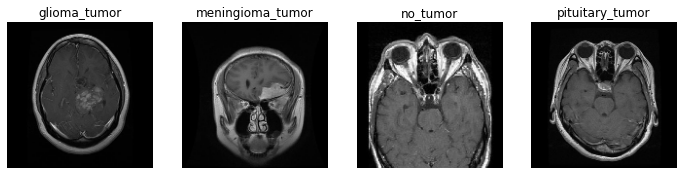

In [4]:
class_samples = {}

for img, label in zip(X_train, Y_train):
    if label not in class_samples:
        class_samples[label] = img
    if len(class_samples) == 4:  
        break

plt.figure(figsize=(12, 6))

for i, (label, img) in enumerate(class_samples.items()):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)  
    plt.title(label)  
    plt.axis("off")  

plt.show()

In [5]:
#X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
#X_train.shape
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Y_train)

In [6]:
X_train = X_train / 255.0

In [7]:
#X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
82/82 [==============================] - 33s 389ms/step - loss: 1.0721 - accuracy: 0.5362 - val_loss: 0.8153 - val_accuracy: 0.6677
Epoch 2/20
82/82 [==============================] - 31s 381ms/step - loss: 0.7095 - accuracy: 0.7105 - val_loss: 0.7810 - val_accuracy: 0.6692
Epoch 3/20
82/82 [==============================] - 31s 381ms/step - loss: 0.5719 - accuracy: 0.7694 - val_loss: 0.5440 - val_accuracy: 0.8070
Epoch 4/20
82/82 [==============================] - 31s 381ms/step - loss: 0.4503 - accuracy: 0.8196 - val_loss: 0.5606 - val_accuracy: 0.8132
Epoch 5/20
82/82 [==============================] - 31s 380ms/step - loss: 0.3379 - accuracy: 0.8667 - val_loss: 0.4409 - val_accuracy: 0.8484
Epoch 6/20
82/82 [==============================] - 31s 378ms/step - loss: 0.2573 - accuracy: 0.9058 - val_loss: 0.4165 - val_accuracy: 0.8668
Epoch 7/20
82/82 [==============================] - 31s 380ms/step - loss: 0.2272 - accuracy: 0.9088 - val_loss: 0.3884 - val_accuracy: 0.8744

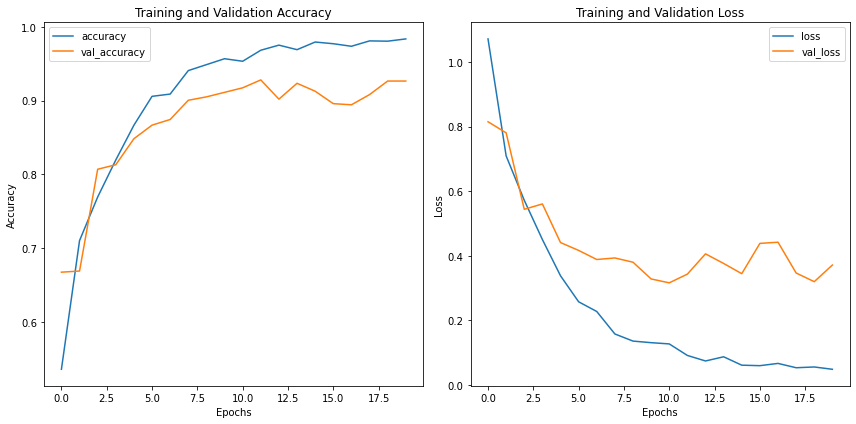

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

21/21 [==============================] - 2s 98ms/step


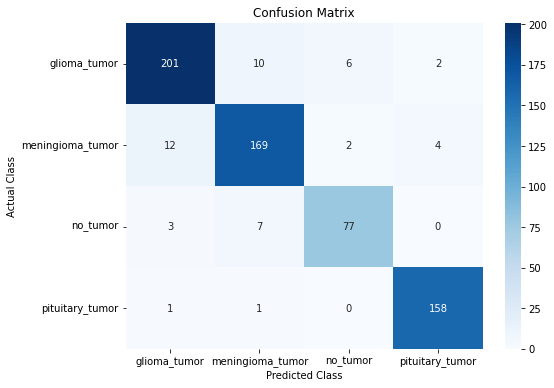

In [12]:
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()